<a href="https://colab.research.google.com/github/lqmanalhakim/size-prediction/blob/main/individuBDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Luqman Alhakim bin Yazid 2019079

**DeepSolar: Unveiling Global Solar Adoption Patterns**

DeepSolar: Unveiling Global Solar Adoption Patterns makes a strong business case while offering real-time insights on solar adoption across the globe. The platform helps solar companies optimise their strategies, helps governments develop focused regulations, and directs investors towards high-potential regions. It has applicability across industries. DeepSolar is a major force in pushing the adoption of sustainable energy because of its global contributions to transparency and cooperation. It also provides a useful tool for well-informed decision-making, hastening the shift to a future powered by solar energy.


1. Which state consumes the most electricity? (electricity_consume_total, state)  
2. Which racial group has the highest rate of solar panel installations? (race_white,race_islander,race_indian_alaska,race_black_africa,race_asian)
3. What type of heating is most commonly used in houses today?(heating_fuel_coal_coke,heating_fuel_electricity,heating_fuel_fuel_oil_kerosene,heating_fuel_gas)
4. Does the level of education in a state impact its capacity to adopt widespread solar panel usage? (education_bachelor, education_college,education_master,education_high_school_graduate_rate)
5. What modes of transportation do people prefer? (transportation_motorcycle_rate,transportation_bicycle_rate,transportation_public_rate,transportation_car_alone_rate)
6. Does the median income of a state have an impact on the prevalence of solar panel installations? (per_capita_income, state, tile_count)
7. Which state has the highest consumption of solar panels? (state,tile_count,total_panel_area)
8. what extent does the widespread adoption of solar panels contribute to a reduction in electricity prices within specific regions? (electricity_price_residential, state)


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq> /dev/null

In [ ]:
!wget -q https://dlcdn.apache.org/spark/spark-3.3.4/spark-3.3.4-bin-hadoop3.tgz

In [ ]:
!tar xf spark-3.3.4-bin-hadoop3.tgz

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.4-bin-hadoop3"

In [ ]:
!pip install -q findspark
import findspark
findspark.init()
findspark.find()

'/content/spark-3.3.4-bin-hadoop3'

In [ ]:
from pyspark.sql.functions import col

IMporting the dataset

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('Deep_Solar').getOrCreate()

In [ ]:
#loading growth_from_industry_transition  dataset
Deep_Solr = spark.read.csv('deepsolar_tract.csv', header=True, inferSchema=True)
Deep_Solar = Deep_Solr.select("electricity_consume_total","state","race_white","race_islander","race_indian_alaska","race_black_africa","race_asian","heating_fuel_coal_coke",
                                       "heating_fuel_electricity","heating_fuel_fuel_oil_kerosene","heating_fuel_gas","tile_count","total_panel_area","education_bachelor", "education_college",
                                       "education_master","education_doctoral_rate","education_high_school_graduate","per_capita_income","transportation_motorcycle_rate","transportation_bicycle_rate","transportation_public_rate",
                                       "transportation_car_alone_rate","electricity_price_residential")
Deep_Solar.show()

+-------------------------+-----+----------+-------------+------------------+-----------------+----------+----------------------+------------------------+------------------------------+----------------+----------+------------------+------------------+-----------------+----------------+-----------------------+------------------------------+-----------------+------------------------------+---------------------------+--------------------------+-----------------------------+-----------------------------+
|electricity_consume_total|state|race_white|race_islander|race_indian_alaska|race_black_africa|race_asian|heating_fuel_coal_coke|heating_fuel_electricity|heating_fuel_fuel_oil_kerosene|heating_fuel_gas|tile_count|  total_panel_area|education_bachelor|education_college|education_master|education_doctoral_rate|education_high_school_graduate|per_capita_income|transportation_motorcycle_rate|transportation_bicycle_rate|transportation_public_rate|transportation_car_alone_rate|electricity_price_r

Data Preprocessing

In [ ]:
#Checking for null values
from pyspark.sql.functions import col, sum

# Checking for null values
Deep_Solar_null = Deep_Solar.select([sum(col(c).isNull().cast("int")).alias(c) for c in Deep_Solar.columns])

Deep_Solar_null.show()

+-------------------------+-----+----------+-------------+------------------+-----------------+----------+----------------------+------------------------+------------------------------+----------------+----------+----------------+------------------+-----------------+----------------+-----------------------+-----------------------------------+-----------------+------------------------------+---------------------------+--------------------------+-----------------------------+-----------------------------+
|electricity_consume_total|state|race_white|race_islander|race_indian_alaska|race_black_africa|race_asian|heating_fuel_coal_coke|heating_fuel_electricity|heating_fuel_fuel_oil_kerosene|heating_fuel_gas|tile_count|total_panel_area|education_bachelor|education_college|education_master|education_doctoral_rate|education_high_school_graduate_rate|per_capita_income|transportation_motorcycle_rate|transportation_bicycle_rate|transportation_public_rate|transportation_car_alone_rate|electricity_p

In [ ]:
Deep_Solar = Deep_Solar.dropna()

In [ ]:
# checking for duplicate values
Deep_Solar_duplicate = Deep_Solar.groupBy(Deep_Solar.columns).count().filter(col('count') > 1).count()

# Print the number of duplicated rows
print("There are {} duplicated rows in the dataset.".format(Deep_Solar_duplicate))

# Drop duplicates and get the new row count
Deep_Solar = Deep_Solar.dropDuplicates()
row_count = Deep_Solar.count()

# Print the number of rows after dropping duplicates
print("Number of rows after dropping duplicates is {}.".format(row_count))

There are 0 duplicated rows in the dataset.
Number of rows after dropping duplicates is 4589.


Analysis

Which state consumes the most electricity?(electricity_consume_total, state)

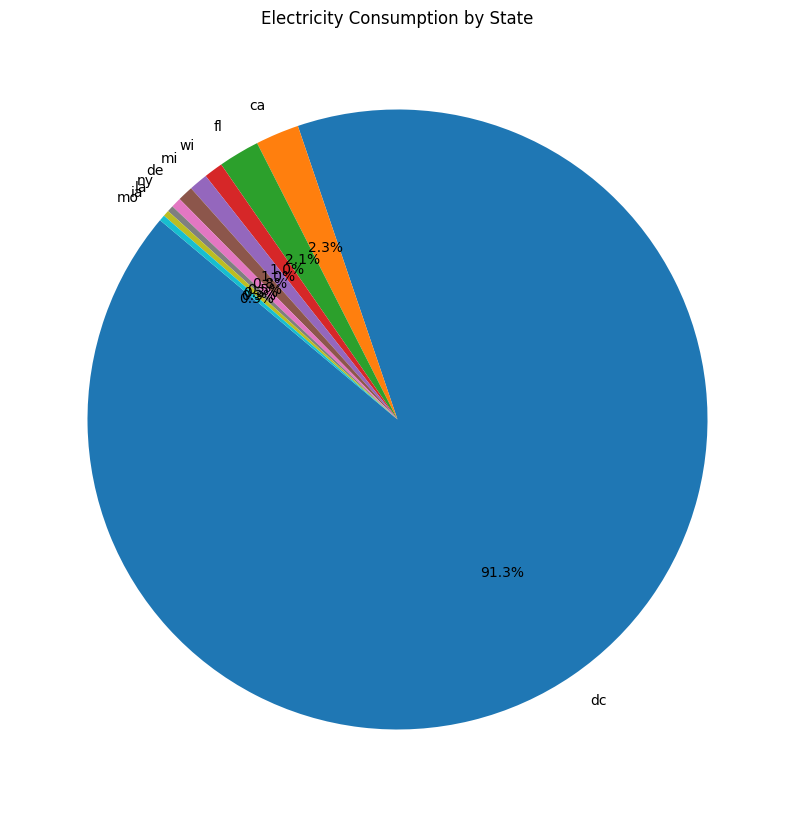

In [ ]:
import matplotlib.pyplot as plt

state_consumption = Deep_Solar.groupBy("state").sum("electricity_consume_total")
state_consumption = state_consumption.orderBy("sum(electricity_consume_total)", ascending=False).limit(10)

# Convert DataFrame to Pandas for plotting
state_consumption_pd = state_consumption.toPandas()

# Plotting Pie Chart
plt.figure(figsize=(10, 15))
plt.pie(state_consumption_pd["sum(electricity_consume_total)"], labels=state_consumption_pd["state"],
        autopct='%1.1f%%', startangle=140)
plt.title("Electricity Consumption by State")
plt.show()



*   mi - michigan
*   ny- new york
*   il - Illinoi
*   tn - Tennessee
*   dc - District of Columbia
*   wi - Wisconsin
*   pa - Pennsylvania
*   sc - South Carolina
*   oh - ohio
*   va - Virginia


---



- As show in the pie graph District of Columbia state consume the most electricity
- The District of Columbia, or D.C., is a special instance because it is a federal district rather than a state. Smaller regions, like D.C, can have higher per capita electricity usage because of things like concentrated business activity, urban density, and government operations.


---



Which racial group has the highest rate of solar panel installations? (race_white,race_islander,race_indian_alaska,race_black_africa,race_asian)

<Figure size 1200x600 with 0 Axes>

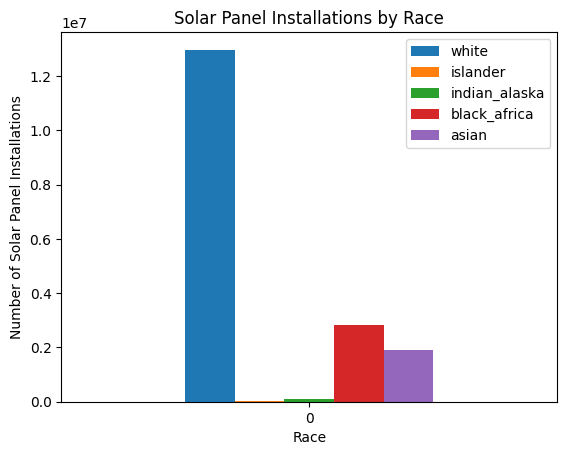

In [ ]:
# Sum the installations for each race
race_installations = Deep_Solar.selectExpr(
    "sum(race_white) as white",
    "sum(race_islander) as islander",
    "sum(race_indian_alaska) as indian_alaska",
    "sum(race_black_africa) as black_africa",
    "sum(race_asian) as asian"
)

# Convert DataFrame to Pandas for plotting
race_installations_pd = race_installations.toPandas()

# Plotting Bar Chart
plt.figure(figsize=(12, 6))
race_installations_pd.plot(kind='bar', rot=0)
plt.xlabel('Race')
plt.ylabel('Number of Solar Panel Installations')
plt.title('Solar Panel Installations by Race')
plt.show()

This are pretty obvious as the dataset took place in the United Stated where the white race are the majority.


---



What type of heating is most commonly used in houses today?(heating_fuel_coal_coke,heating_fuel_electricity,heating_fuel_fuel_oil_kerosene,heating_fuel_gas)

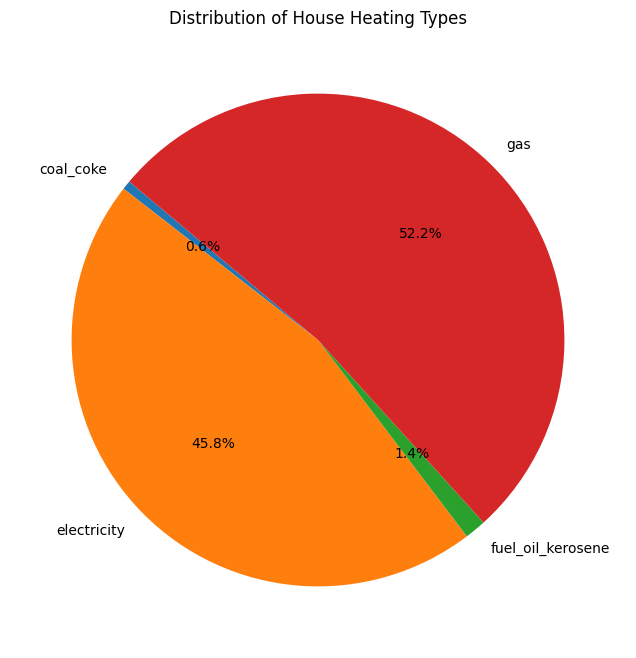

In [ ]:
heating_counts = Deep_Solar.selectExpr(
    "sum(heating_fuel_coal_coke) as coal_coke",
    "sum(heating_fuel_electricity) as electricity",
    "sum(heating_fuel_fuel_oil_kerosene) as fuel_oil_kerosene",
    "sum(heating_fuel_gas) as gas"
)

# Convert DataFrame to Pandas for plotting
heating_counts_pd = heating_counts.toPandas()

# Plotting Pie Chart
labels = heating_counts_pd.columns
sizes = heating_counts_pd.iloc[0].tolist()

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of House Heating Types")
plt.show()

- Two of the most used for heating used in house are the electricty (45.8%) and gas (52.2%) ,that is why the installation of the solar panel start to began in certain area .
- Among the most popular types of residential heating systems are central heating systems, especially those that employ forced air or radiant heating. Furnaces and other forced-air systems have been widely used for decades because they provide effective heating.


---



Does the level of education in a state impact its capacity to adopt widespread solar panel usage? (education_bachelor, education_college,education_master,education_high_school_graduate_rate)

<Figure size 1000x600 with 0 Axes>

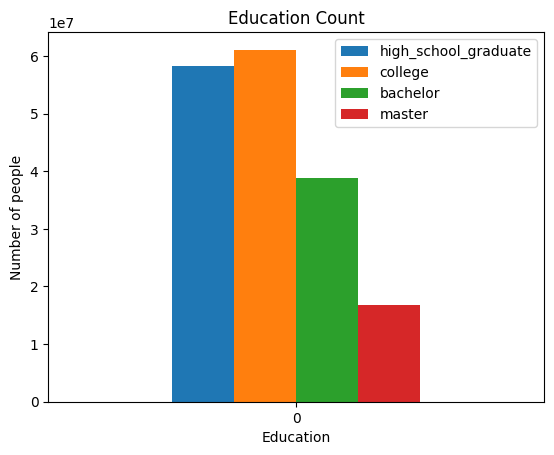

In [ ]:
# Sum the installations for each race
education_counts = Deep_Solar.selectExpr(
    "sum(education_high_school_graduate) as high_school_graduate",
    "sum(education_college) as college",
    "sum(education_bachelor) as bachelor",
    "sum(education_master) as master"
)

# Convert DataFrame to Pandas for plotting
education_counts_pd = education_counts.toPandas()

# Plotting Bar Chart
plt.figure(figsize=(10, 6))
education_counts_pd.plot(kind='bar', rot=0)
plt.xlabel('Education')
plt.ylabel('Number of people')
plt.title('Education Count')
plt.show()

- The level of education in a state seems to have an impact on the acceptance of widespread solar panel usage, which may be related to economic capability. Higher education levels, such as bachelor's, college, or master's degrees, may increase a person's likelihood of having the money to install solar panels. This relationship may be explained by the increased earning potential and increased financial literacy that come with higher education.
- Furthermore, those with higher levels of education might be more conscious of the long-term advantages of renewable energy, which would motivate them to prioritise and budget for sustainable activities like the adoption of solar energy.

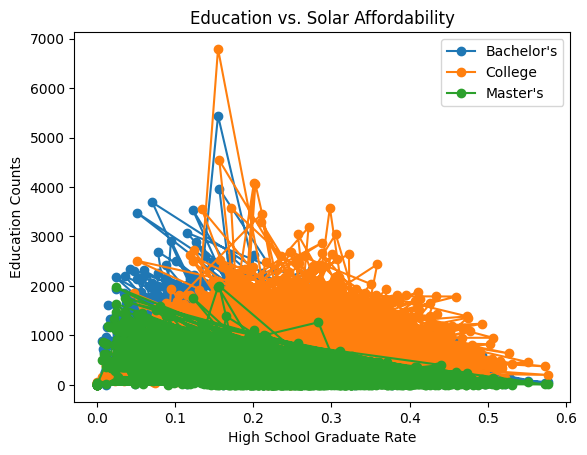

In [ ]:
# Assuming the data is already loaded, you can use the following code to create a simple plot
education_data = Deep_Solar.select("education_bachelor", "education_college", "education_master", "education_high_school_graduate_rate").toPandas()

# Plotting Line Chart
education_data.plot(x="education_high_school_graduate_rate", y=["education_bachelor", "education_college", "education_master"], kind="line", marker='o')
plt.title("Education vs. Solar Affordability")
plt.xlabel("High School Graduate Rate")
plt.ylabel("Education Counts")
plt.legend(["Bachelor's", "College", "Master's"])
plt.show()



Shown in the plot graph are many high school graduate are in the future could become the bachelor, college and master's holder. This is the good news for the future and the next generation as many people strive to become more successful and generate more income for the solar panel as stated in the previous explanation.


---



What modes of transportation do people prefer?
(transportation_motorcycle_rate,transportation_bicycle_rate,transportation_public_rate,transportation_car_alone_rate)

   motorcycle_rate  bicycle_rate  public_rate  car_alone_rate
0        10.596104     43.889236   328.817211     3352.936973


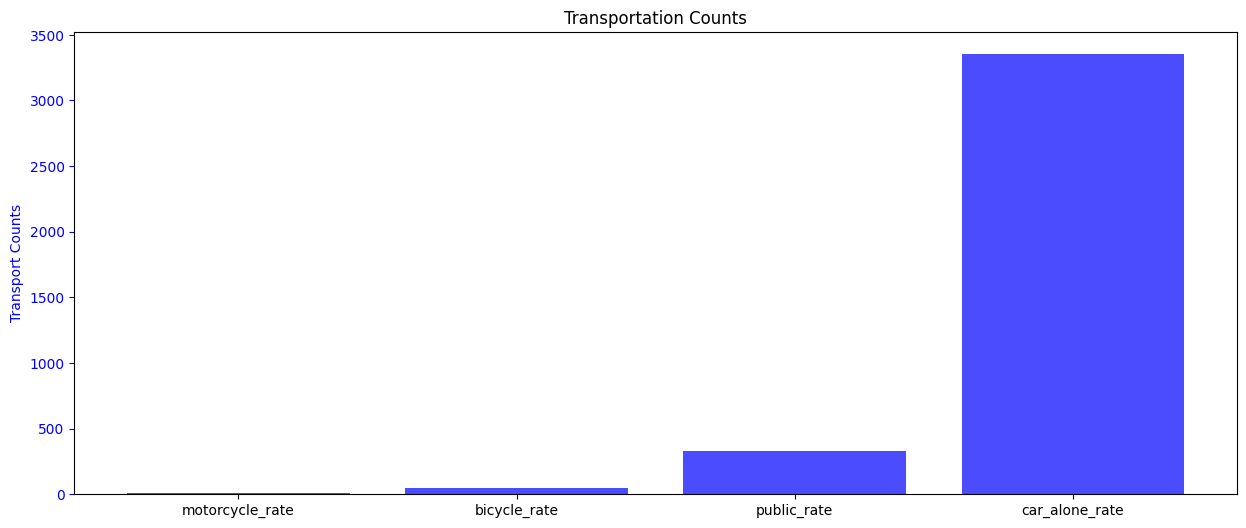

In [ ]:
# Assuming the data is already loaded, you can use the following code to analyze the correlation
Transport_counts = Deep_Solar.selectExpr(
    "sum(transportation_motorcycle_rate) as motorcycle_rate",
    "sum(transportation_bicycle_rate) as bicycle_rate",
    "sum(transportation_public_rate) as public_rate",
    "sum(transportation_car_alone_rate) as car_alone_rate"
)

# Convert DataFrame to Pandas for plotting
Transport_counts_pd = Transport_counts.toPandas()

# Print the DataFrame to check the data
print(Transport_counts_pd)

# Plotting Bar Chart
fig, ax1 = plt.subplots(figsize=(15, 6))

labels = Transport_counts_pd.columns  # Use all columns
values = Transport_counts_pd.iloc[0]
ax1.bar(labels, values, color='blue', alpha=0.7)
ax1.set_ylabel('Transport Counts', color='blue')
ax1.tick_params('y', colors='blue')

plt.title("Transportation Counts")
plt.show()

- As many people prefer to transport by using car has increase the need for electricity becuase many car user are migrated from oil based car to electricity based car.
- this count are who prefer to use car alone not include the people who liked to travel together, this will add on how many electricity consumption need
- this is why solar panel are need in many state.


---



Does the median income of a state have an impact on the prevalence of solar panel installations? (per_capita_income, state, tile_count)

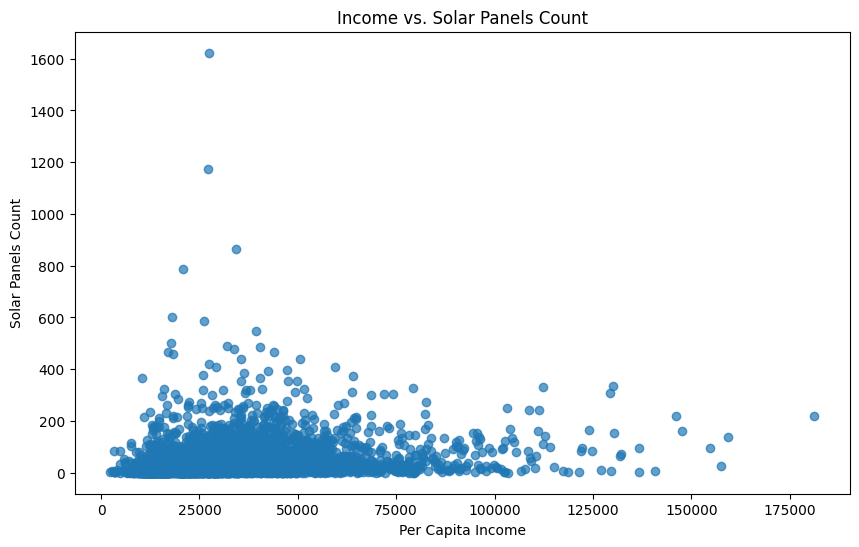

In [ ]:
# Assuming the data is already loaded, you can use the following code to create a scatter plot
income_solar_data = Deep_Solar.select("per_capita_income").toPandas()

# Adding a column for the number of solar panels built, you can replace 'solar_panels_count' with the actual column name
income_solar_data['tile_count'] = Deep_Solar.select("tile_count").toPandas()

# Plotting Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(income_solar_data['per_capita_income'], income_solar_data['tile_count'], alpha=0.7)
plt.title("Income vs. Solar Panels Count")
plt.xlabel("Per Capita Income")
plt.ylabel("Solar Panels Count")
plt.show()


- A useful way to understand the relationship between economic considerations and the adoption of renewable energy technology is to look at the association between the number of solar panels constructed and median income levels.
- just per capita income in 25000 has a higher on 1600 solar panel install , so this are quite pretty good ofr it does not need a higher income to afford the solar panel

In [ ]:
correlation = income_solar_data['per_capita_income'].corr(income_solar_data['tile_count'])
print(f"Correlation between Per Capita Income and Solar Panels Count: {correlation}")


Correlation between Per Capita Income and Solar Panels Count: 0.23705867146850784


In our analysis of state-level data, we found a positive correlation of 0.23 between per capita income and the count of solar panels. This indicates a weak positive relationship, suggesting that as per capita income increases, there is a tendency for the count of solar panels to also increase. However, it's important to note that the correlation is relatively low, suggesting that per capita income alone may not be a strong predictor of the number of solar panels built. Other factors, such as state policies, incentives, and geographical considerations, may play a more significant role in influencing the installation of solar panels.


---



Which state has the highest consumption of solar panels? (state,tile_count,total_panel_area)

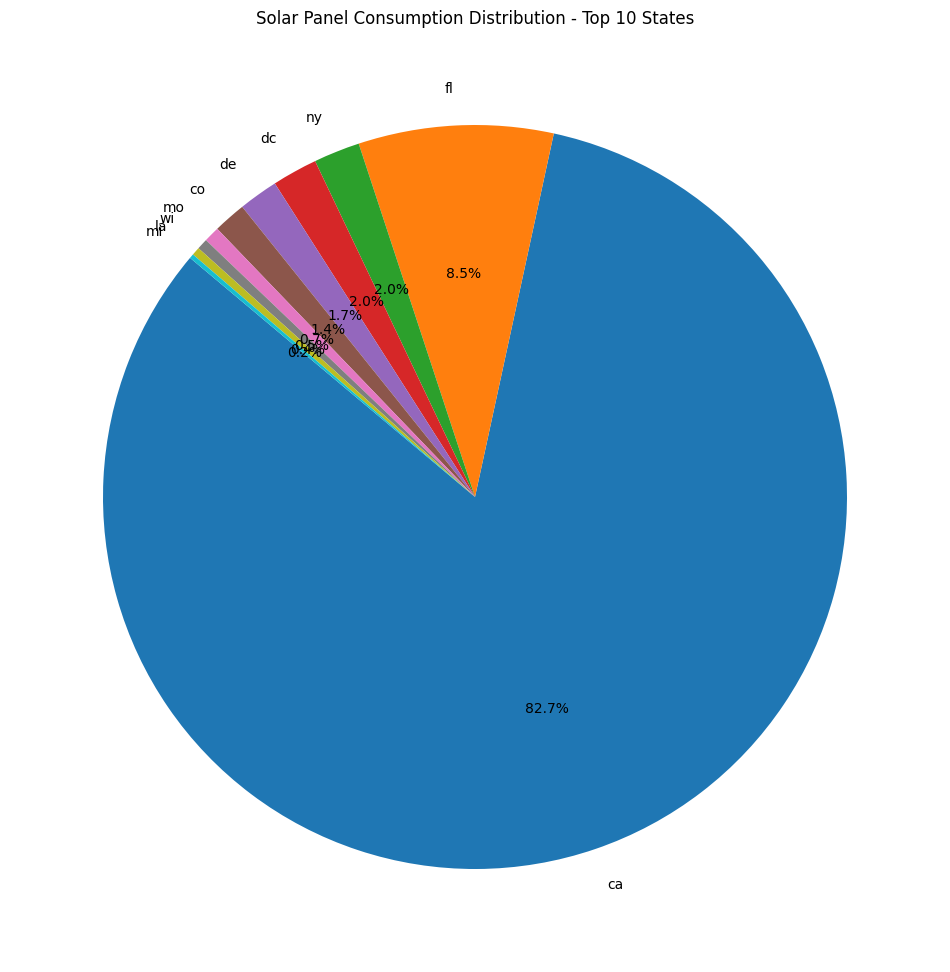

In [ ]:
from pyspark.sql.functions import desc

# Group by state and sum the tile_count for each state
state_solar_consumption = Deep_Solar.groupBy("state").agg({"tile_count": "sum"})

# Order by tile_count in descending order and limit to top 10 states
top_10_states = state_solar_consumption.orderBy(desc("sum(tile_count)")).limit(10)

# Convert the PySpark DataFrame to Pandas for plotting
top_10_states_pd = top_10_states.toPandas()

# Plotting Pie Chart
plt.figure(figsize=(12, 13))
plt.pie(top_10_states_pd['sum(tile_count)'], labels=top_10_states_pd['state'], autopct='%1.1f%%', startangle=140)
plt.title("Solar Panel Consumption Distribution - Top 10 States")
plt.show()

California got the highest consumption of solar panel .


---



 what extent does the widespread adoption of solar panels contribute to a reduction in electricity prices within specific regions? (electricity_price_residential, state)

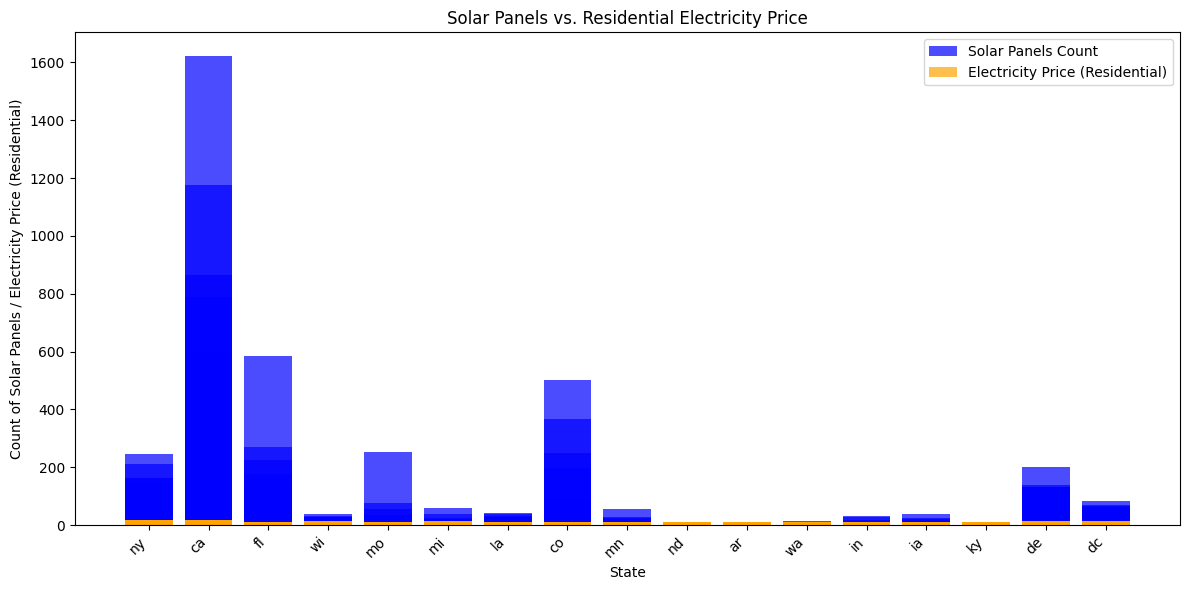

In [ ]:
# Assuming the data is already loaded, you can use the following code to create a simple bar chart
solar_electricity_data = Deep_Solar.toPandas()

# Plotting Bar Chart
plt.figure(figsize=(12, 6))
plt.bar(solar_electricity_data['state'], solar_electricity_data['tile_count'], color='blue', alpha=0.7, label='Solar Panels Count')
plt.bar(solar_electricity_data['state'], solar_electricity_data['electricity_price_residential'], color='orange', alpha=0.7, label='Electricity Price (Residential)')

plt.title("Solar Panels vs. Residential Electricity Price")
plt.xlabel("State")
plt.ylabel("Count of Solar Panels / Electricity Price (Residential)")
plt.legend()
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()


- California state got the most solar panel install but the elcetrcty price are quite the same with the other stated even with the state that does not have solar panel install
- If there are supportive regulations and effective grid integration mechanisms in place, and the amount of solar power generated exceeds demand, then a greater deployment of solar panels may help drive down the price of electricity. The overall influence on electricity prices is also shaped by economic considerations, such as finance and installation expenses.
